# <center><b style="color: rgb(219, 90, 58);">REGRESIÓN LINEAL PARA LA PREDICCIÓN DEL PRECIO DE INMUEBLES</b></center>

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [55]:
# Se importa la base de datos desde el archivo de Excel:
data = pd.read_excel(io = "../data/regression_data.xls", sheet_name="regression_data1")

# Se le da formato:
df = pd.DataFrame(data)

# Se imprimen los 6 primeros resgistros de la base de datos:
df.head(6)
# print(df) imprimiría la tabla completa aunque no será posible porque su tamaño excede el límite máximo.

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


## <b style="color: rgb(62, 142, 180);">1. PREPARACIÓN DE LOS DATOS PARA SU ANÁLISIS: LIMPIEZA, FILTRADO Y PREPARACIÓN DE LA BASE DE DATOS</b>

#### Se limpia la base de datos lo cual implica.

#### <ul><li type=square>Estandarizar los nombres de las columnas: todos los valores deben seguir el mismo formato, unidades...</li><li type=square>Estandarizar unidades de una sola columna.</li><li type=square>Eliminar y reorganizar columnas.</li><li type=square>Trabajar con tipos de datos (establecer los tipos correctos).</li><li type=square>Filtrado de datos.</li><li type=square>Eliminar duplicados (redundantes, no agregan información).</li><li type=square>Corregir errores tipográficos.</li><li type=square>Reemplazar/eliminar valores faltantes (la mayoría de los modelos no pueden manejarlos).</li></ul>

#### En definitiva, se prepara la tabla para trabajar con ella.

#### Se llevan a cabo las siguientes comprobaciones y operaciones:

### <b style="color: rgb(245, 115, 83);">1. Se comprueba los tipos de datos a nivel de variables de programación de Python:</b>

#### Se verifica que todas son variables numéricas (int, float e incluso la fecha que se puede manejar como numérica). Por tanto, no será necesaria ninguna modificación pues siendo todas numéricas son aptas para llevar a cabo un análisis de regresión lineal.

In [56]:
# Por medio de la función dtypes(), se muestran los tipos de datos de cada columna de la base de datos:
print(df.dtypes)

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object


### <b style="color: rgb(245, 115, 83);">2. Se obtiene información general del dataframe:</b>

#### Se comprueba que no hay celdas con valores nulos pues de todas las columnas (21) y filas (21597) el contenido es non null.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### <b style="color: rgb(245, 115, 83);">3. Se comprueba si existen valores perdidos (<i>missing values</i>):</b>

#### Los valores perdidos son aquellos que no almacenan ningún valor. Estos valores en la librería Pandas se identifican con Non y NaN (Not a Number). Se comprueba que no hay ningún valor perdido.

In [58]:
df.isna().sum() # Se utiliza la función sum() para obtener el sumatorio y poder obtener la información que necesitamos.

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### <b style="color: rgb(245, 115, 83);">4. Se detectan valores atípicos (<i>outliers</i>):</b>

#### Un valor atípico es una observación que numéricamente es distante de los restantes datos.

#### Para detectarlos se utiliza la librería sklearn.

#### 1º. Se comprueban los valores atípicos en relación con las columnas que contienen <u><b>valores cuantificables</b></u> a efectos de comprobar si alguno despunta de alguna manera. Sólo se comprueba respecto a aquellas variables que tenga sentido ya que, por ejemplo, no tendría sentido comprobar un pico de latitud, longitud o código postal. De modo que: sqft_basement, sqft_living, sqft_lot, sqft_living15, sqft_lot15, sqft_above, price.

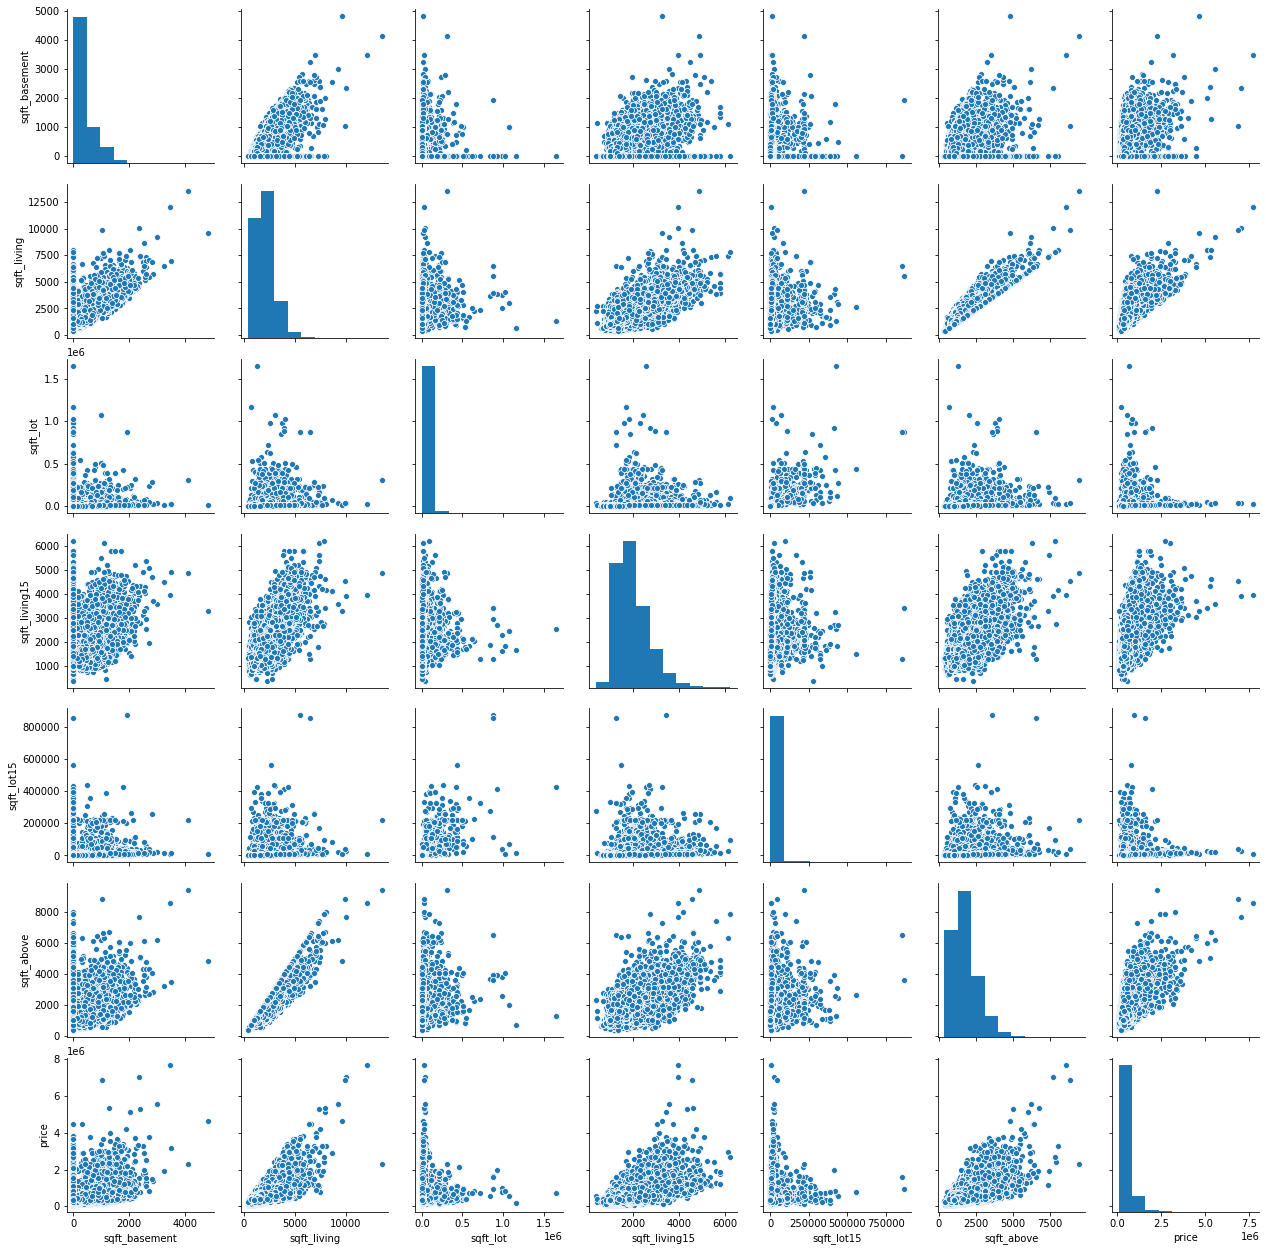

In [59]:
# Se utiliza la función pairplot() para trazar diversas distribuciones bivariadas por pares en el conjunto de datos:
# Se muestra como una matriz de gráficos siendo los gráficos disgonales gráficos nivariados.
sns.pairplot(df[['sqft_basement', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'price']])

#### No se observan en realidad valores atípicos ya que aunque en apariencia se observan ciertos valores que parecen estar distanciados, en realidad se hayan dentro del campo que marca la tendencia. 


#### 2º. Se comprueban los valores atípicos en <u><b>otras columnas</b></u>. Por ejemplo, en waterfront se comprueba que sólo tenga valores 0 o 1, en grade que los valores vayan de 1 a 13, en bedrroms y bathrooms que no existan valores que destaquen demasiado, etc. De modo que: bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated.

#### Para realizar esta tarea resulta útil la función describe() de la librería Pandas que nos proporciona un resmen de las estadísticas del DataFrame. Comprobando los máximos y los mínimos se pueden detectar estos valores atípicos. También se puede utilizar la función unique() de la Librería Pandas que proporciona los valores únicos de cada columna.

In [60]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


#### <ul><li>bedrooms: se observa un valor sospechoso porque muestra un mínimo de 1 habitación, pero un máximo de 33 habitaciones. Podría tratarse de un valor atípico así que se saca un plot (boxenplot) para tratar de averiguar qué podría estar ocurriendo:</ul>

<AxesSubplot:xlabel='bedrooms'>

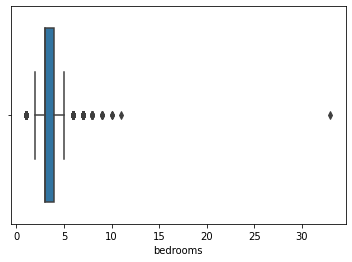

In [61]:
sns.boxplot(df['bedrooms'])

#### Se observa claramente un <i>outlier</i> en las 33 habitaciones y otros 3 en torno a las 10 habitaciones. De manera que se procede a filtrar:

In [62]:
df = df[df.bedrooms <= 5] # Se filtra hasta las 5 habitaciones.
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.126300e+04,21263.000000,21263.000000,21263.000000,2.126300e+04,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,2.126300e+04
mean,4.583740e+09,3.326012,2.099163,2059.754503,1.505278e+04,1.491911,0.007478,0.229883,3.408926,7.650849,1776.172365,283.582138,1971.141419,83.070122,98077.909937,47.559664,-122.213521,1982.070404,12734.246155,5.354206e+05
std,2.877828e+09,0.827807,0.749797,893.214278,4.146123e+04,0.539395,0.086152,0.758495,0.650007,1.168076,814.804818,432.448929,29.342651,398.637387,53.509168,0.138839,0.141136,682.020008,27175.744967,3.547799e+05
min,1.200019e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123700e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469600,-122.328000,1480.000000,5100.000000,3.200000e+05
50%,3.904940e+09,3.000000,2.250000,1900.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000,4.500000e+05
75%,7.325900e+09,4.000000,2.500000,2520.000000,1.062300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,545.000000,1997.000000,0.000000,98117.000000,47.678150,-122.124000,2360.000000,10078.000000,6.399665e+05
max,9.900000e+09,5.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.060000e+06


#### <ul><li>bathrooms: se realiza la misma operación que con bedrooms, pero previamente se eliminan los decimales lo cual puede lograrse transformando el float en int:</li></ul>

In [63]:
# Se comprueban los valores únicos:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [64]:
# Se transforma el float en int:
df['bathrooms'] = df['bathrooms'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21263 non-null  int64         
 1   date           21263 non-null  datetime64[ns]
 2   bedrooms       21263 non-null  int64         
 3   bathrooms      21263 non-null  int64         
 4   sqft_living    21263 non-null  int64         
 5   sqft_lot       21263 non-null  int64         
 6   floors         21263 non-null  float64       
 7   waterfront     21263 non-null  int64         
 8   view           21263 non-null  int64         
 9   condition      21263 non-null  int64         
 10  grade          21263 non-null  int64         
 11  sqft_above     21263 non-null  int64         
 12  sqft_basement  21263 non-null  int64         
 13  yr_built       21263 non-null  int64         
 14  yr_renovated   21263 non-null  int64         
 15  zipcode        2126

In [65]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.126300e+04,21263.000000,21263.000000,21263.000000,2.126300e+04,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,2.126300e+04
mean,4.583740e+09,3.326012,1.733763,2059.754503,1.505278e+04,1.491911,0.007478,0.229883,3.408926,7.650849,1776.172365,283.582138,1971.141419,83.070122,98077.909937,47.559664,-122.213521,1982.070404,12734.246155,5.354206e+05
std,2.877828e+09,0.827807,0.712105,893.214278,4.146123e+04,0.539395,0.086152,0.758495,0.650007,1.168076,814.804818,432.448929,29.342651,398.637387,53.509168,0.138839,0.141136,682.020008,27175.744967,3.547799e+05
min,1.200019e+06,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123700e+09,3.000000,1.000000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469600,-122.328000,1480.000000,5100.000000,3.200000e+05
50%,3.904940e+09,3.000000,2.000000,1900.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000,4.500000e+05
75%,7.325900e+09,4.000000,2.000000,2520.000000,1.062300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,545.000000,1997.000000,0.000000,98117.000000,47.678150,-122.124000,2360.000000,10078.000000,6.399665e+05
max,9.900000e+09,5.000000,6.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.060000e+06


<AxesSubplot:xlabel='bathrooms'>

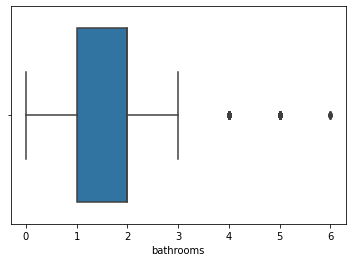

In [66]:
# Se saca un plot donde poder visualizar los posibles valores atípicos:
sns.boxplot(df['bathrooms'])

#### Se observan claramente 3 <i>outliers</i> en 6, 7 y 8 baños. De manera que se procede a filtrar:

In [67]:
df = df[df.bathrooms <= 3] # Se filtra hasta las 3 baños.
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.094400e+04,20944.000000,20944.000000,20944.000000,2.094400e+04,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,2.094400e+04
mean,4.594638e+09,3.309922,1.696811,2020.454927,1.471191e+04,1.484673,0.006684,0.217962,3.411144,7.611774,1744.197383,276.257544,1970.851939,81.757974,98078.180052,47.559146,-122.214269,1962.301471,12481.520913,5.195085e+05
std,2.878432e+09,0.820210,0.648836,825.377015,4.025135e+04,0.538144,0.081487,0.736754,0.650889,1.121522,763.608574,420.299251,29.293945,395.601177,53.516357,0.139369,0.141085,657.742287,25629.575203,3.120914e+05
min,1.200019e+06,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.126049e+09,3.000000,1.000000,1410.000000,5.006750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.467550,-122.329000,1480.000000,5093.500000,3.199900e+05
50%,3.905040e+09,3.000000,2.000000,1880.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.570550,-122.232000,1820.000000,7590.000000,4.450000e+05
75%,7.335400e+09,4.000000,2.000000,2490.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,530.000000,1996.000000,0.000000,98118.000000,47.678500,-122.125000,2330.000000,10001.000000,6.270000e+05
max,9.900000e+09,5.000000,3.000000,7620.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000,4.490000e+06


#### <ul><li>floors: se detectan ciertos valores sospechosos pues el máximo son 3,5 pisos, de modo que se procede a comprobar los valores únicos de esta columna:</li></ul>

In [68]:
# Se comprueban los valores únicos:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

#### El problema de los decimales se puede solucionar transformando el float en un int:

In [69]:
# Se transforma el float en int:
df['floors'] = df['floors'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20944 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20944 non-null  int64         
 1   date           20944 non-null  datetime64[ns]
 2   bedrooms       20944 non-null  int64         
 3   bathrooms      20944 non-null  int64         
 4   sqft_living    20944 non-null  int64         
 5   sqft_lot       20944 non-null  int64         
 6   floors         20944 non-null  int64         
 7   waterfront     20944 non-null  int64         
 8   view           20944 non-null  int64         
 9   condition      20944 non-null  int64         
 10  grade          20944 non-null  int64         
 11  sqft_above     20944 non-null  int64         
 12  sqft_basement  20944 non-null  int64         
 13  yr_built       20944 non-null  int64         
 14  yr_renovated   20944 non-null  int64         
 15  zipcode        2094

#### <ul><li>waterfront: no hay valores atípicos pues va de 0 a 1.</li><li>view: sí hay valores atípicos porque va de 0 a 4, de modo que se procede a su filtrado:</li></ul>

In [70]:
df = df[df.view <= 1] # Se filtra hasta 1.
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.932000e+04,19320.000000,19320.000000,19320.000000,1.932000e+04,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,1.932000e+04
mean,4.582755e+09,3.295963,1.673602,1964.657143,1.387664e+04,1.435766,0.000052,0.016304,3.403002,7.544203,1716.966253,247.690890,1971.382350,71.698706,98076.879400,47.559219,-122.211457,1916.052070,11964.989959,4.894683e+05
std,2.873368e+09,0.814667,0.635319,781.947657,3.605380e+04,0.550296,0.007194,0.126647,0.646565,1.074825,747.668365,391.108727,29.253941,371.464573,52.657666,0.140279,0.140060,627.367569,23982.017192,2.658356e+05
min,1.200019e+06,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000,7.800000e+04
25%,2.125059e+09,3.000000,1.000000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1952.000000,0.000000,98033.000000,47.463100,-122.325000,1460.000000,5027.000000,3.100000e+05
50%,3.904902e+09,3.000000,2.000000,1830.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.225000,1790.000000,7528.500000,4.300000e+05
75%,7.305300e+09,4.000000,2.000000,2420.000000,1.022300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,480.000000,1997.000000,0.000000,98117.000000,47.680400,-122.123000,2260.000000,9820.250000,5.990000e+05
max,9.900000e+09,5.000000,3.000000,6810.000000,1.164794e+06,3.000000,1.000000,1.000000,5.000000,13.000000,6430.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000,4.490000e+06


#### <ul><li>condition: no se observan valores atípicos porque su mínimo es 1 y su máximo es 5 cuando debe ir de 1 a 5.</li><li>grade: no se observan valores atípicos porque su mínimo es 3 y su máximo es 13 cuando debe ir de 1 a 13.</li><li>yr_built: no se observan valores atípicos porque va de 1900 a 2015.</li><li>yr_renovated: sí que se observan valores sospechosos porque su máximo es 2015, pero su mínimo es el año 0. Sin embargo, mñas adelante se interpretará el valor 0 de esta columna como el hecho de que el inmueble no ha sido renovado y con estos datos se creará una variable dummy, así que no se filtra este dato. A continuación, se exponen los valores únicos de esta columa y ahí se observa que uno de ellos es el 0 (que interpretaremos como ausencia de renovación) y el resto son años diferentes a partir de 1991 por lo que tales valores no son sospechosos.</li></ul>

In [71]:
# Primero comprobamos a partir de qué año constan datos en la base de datos.
# Para ello se obtienen los valores únicos en la columna de yr_renovated:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

### <b style="color: rgb(245, 115, 83);">5. Se crean variables nuevas:</b>

#### Se crean variables nuevas que pueden resultar útiles para el análisis. Estas variables nos muestran información que nos proporcionan los datos almacenados en la tabla, no se trata de datos nuevos.

#### Algunas de estas variables con variables <i>dummies</i>. Una variable <i>dummy</i> en estadística es una variable, y en concreto en el análisis de regresión, es una variable ficticia que sólo puede tomar el valor 1 o el valor 0 para indicar la presencia o la ausencia de algún efecto categórico que puede afectar al resultado.

In [72]:
# Creamos una variable dummy que tome el valor 1 si el inmueble tiene basement o 0 si no lo tiene:
df['dummy_basement'] = list(map(lambda x: 1 if x>0 else 0, df.sqft_basement.tolist()))

# Creamos una variable dummy que tome el valor 1 si el inmueble ha sido renovado o 0 si no lo ha sido:
df['dummy_renovated'] = list(map(lambda x: 1 if x>0 else 0, df.yr_renovated.tolist()))

# Creamos una variable que indique el año de venta del inmueble:
df['year'] = list(map(lambda x: x.year,df.date.tolist()))

# Creamos una varibale que indique la antigüedad con que se vendió el inmueble (año de venta menos año de construcción del inmueble):
df['antiguedad'] = df.apply(lambda x: x['year']-x['yr_built'], axis=1)

# Creamos una variable que sea el año de venta menos el año de construcción si el año de renovación es 0 (no hubo renovación)
# o año de venta menos año de renovación si el año de renovación es distinto de 0 (sí hubo renovación):
# Nos indica el nº de años desde la última renovación:
df['time_last_renovation'] = df.apply(lambda x: x['year']-x['yr_renovated'] if x.dummy_renovated ==1 else 0, axis=1)

# Creamos una variable 'sqft_living_actualized' que sea sqft_living si es 2014 o sqft_living15 si es 2015:
df['sqft_living_actualized'] = df.apply(lambda x: x['sqft_living'] if x.year == 2014 else x['sqft_living15'], axis=1)

# Creamos una variable 'sqft_lot_actualized' que sea sqft_lot si es 2014 o sqft_lot15 si es 2015:
df['sqft_lot_actualized'] = df.apply(lambda x: x['sqft_lot'] if x.year == 2014 else x['sqft_lot15'], axis=1)

# Creamos una variable para comprobar si hay variación temporal del precio:
df['trend'] = df.apply(lambda x: 12+x.date.month if x.year == 2015 else x.date.month, axis=1)

# Creamos un grupo de variables dummies: 2014 = 1 y 2015 = 0 y una por estación:
df['dummy_14'] = df.apply(lambda x: 1 if x.year == 2014 else 0, axis=1)
df['dummy_winter'] = df.apply(lambda x: 1 if x.date.month in[1,2,3] else 0, axis=1)
df['dummy_spring'] = df.apply(lambda x: 1 if x.date.month in[4,5,6] else 0, axis=1)
df['dummy_summer'] = df.apply(lambda x: 1 if x.date.month in[7,8,9] else 0, axis=1)
df['dummy_autom'] = df.apply(lambda x: 1 if x.date.month in[10,11,12] else 0, axis=1)

# Creamos una variable que nos indica qué casas que tienen vistas al mar se vendieron en primavera:
df['dummy_spring_waterfront'] = df.dummy_spring * df.waterfront

df.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,time_last_renovation,sqft_living_actualized,sqft_lot_actualized,trend,dummy_14,dummy_winter,dummy_spring,dummy_summer,dummy_autom,dummy_spring_waterfront
0,7129300520,2014-10-13,3,1,1180,5650,1,0,0,3,...,0,1180,5650,10,1,0,0,0,1,0
1,6414100192,2014-12-09,3,2,2570,7242,2,0,0,3,...,23,2570,7242,12,1,0,0,0,1,0
2,5631500400,2015-02-25,2,1,770,10000,1,0,0,3,...,0,2720,8062,14,0,1,0,0,0,0
3,2487200875,2014-12-09,4,3,1960,5000,1,0,0,5,...,0,1960,5000,12,1,0,0,0,1,0
4,1954400510,2015-02-18,3,2,1680,8080,1,0,0,3,...,0,1800,7503,14,0,1,0,0,0,0


### <b style="color: rgb(245, 115, 83);">6. Se exportan los datos limpios:</b>

#### Se exportan los datos limpios en un archivo con extensión .csv.

In [73]:
df.to_csv('../data/clean_data.csv')

## <b style="color: rgb(62, 142, 180);">2. ANÁLISIS DE REGRESIÓN LINEAR</b>

#### El objetivo de un modelo de regresión es intentar explicar la relación que existe entre una variable dependiente (Y) y una serie de variables independientes (X1, X2... Xn).

#### Partimos de la utilización de la técnica de regresión de los Mínimos Cuadrados Ordinarios (OLS) de modo que buscaremos que el resultado de r^2 sea lo más cercano posible a 1 pues cuanto más se acerque a 1, mejor será el modelo.

### <b style="color: rgb(245, 115, 83);">MODELO ADICIONAL 1:</b>

#### Comienzan las tareas de análisis con la <b><u>CREACIÓN DEL MODELO</u></b>. En este modelo la variable dependiente (Y) es el precio de los inmuebles que se quiere predecir y como variables dependientes se han tomado las siguientes: 'bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'sqft_above', 'sqft_living_actualized', 'sqft_lot_actualized'.

#### <u>Este modelo se distingue del Modelo Principal 1 en que no tiene en cuenta la ubicación de los inmuebles y tampoco se han tomado las variables dummy</u>. Utiliza los datos que contiene el dataset, tal y como los recoge la base de datos a excepción de la superficie habitable y la superficie del solar ya que estos datos cuentan con varias columnas que recogen información contradictoria si se las tienen en cuenta al mismo tiempo para el mismo registro. Es por ello que este modelo opta por utilizar las variables 'sqft_living_actualized' y 'sqft_lot_actualized'.

In [74]:
Y = df.price #Variable explicada.
regresores = ['bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'sqft_above', 'sqft_living_actualized', 'sqft_lot_actualized']
X = df[regresores] #Los regresores: variables que explican.

# Escalamos: a cada valor de la variable le restamos su media y dividimos ese resultado entre la desviación típica.
# Nos queda entre -1 y 1.
scaler = StandardScaler()
print(scaler.fit(X))

X = scaler.transform(X)

StandardScaler()


#### A continuación, <b><u>SE DIVIDE LA BASE DE DATOS</u></b> en una parte de entrenamiento (67%) y una parte de test (33%).

In [75]:
# División de la BD en parte de entrenamiento (67) y parte de test (33):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

#### Seguidamente, <b><u>SE ENTRENA EL MODELO</u></b>.

In [76]:
#Entrenamiento del modelo para el 66% de los datos de la BD:
modelA1 = LinearRegression(fit_intercept=True).fit(X_train,Y_train)

#### Por último, <b><u>SE EVALÚA EL MODELO</u></b>.

<AxesSubplot:xlabel='price'>

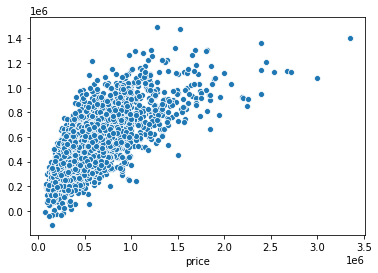

In [77]:
# Evaluar el modelo:
sns.scatterplot(Y_test, modelA1.predict(X_test)) # La función predict() ya tiene en cuenta el intercept.

#### Se comprueba el valor de los cuadrados <b><u>OLS</u></b>:

In [78]:
modelA1.score(X,Y) #r^2

0.5142114236858528

#### Este resultado de 0.51 nos indica que el 51% de la variación del precio de los inmuebles es explicada por la información de la base de datos y el resto hasta el 100% por otra infromación que no está en la base de datos. 0.51 no es un resultado bueno y es un resultado peor que el de nuestro modelo principal. De modo que teniendo en cuenta sólo los datos que nos proporciona el dataset, tal como están, no conseguimos un buen modelo.

#### A efectos de obtener mayor información y más conclusiones interesantes, se desglosan los correspondientes <b><u>COEFICIENTES</u></b>:

In [79]:
for i in range(len(regresores)):
    print(regresores[i],list(modelA1.coef_)[i])

bathrooms 43.2032573117697
bedrooms -25703.153016723787
floors -15118.707616107386
waterfront 308.6419417926683
view 18669.67327839866
condition 30203.881786056176
grade 112417.33525785219
sqft_basement 50158.97054379843
sqft_above 87244.14066549262
sqft_living_actualized 19238.8807148731
sqft_lot_actualized -6754.068262269774


In [80]:
modelA1.intercept_

488762.1241547996

#### Finalmente, se <b><u>GUARDA EL MODELO</b></u>:

In [81]:
pickle.dump(modelA1, open("../models/modelA1.pkl", "wb"))
modelA1 = pickle.load(open("../models/modelA1.pkl", "rb"))

#### Se <b><u>GUARDA</b></u> el scaler:

In [82]:
pickle.dump(scaler, open('../scalers/scaler_modelA1.pkl', 'wb'))
sc = pickle.load(open('../scalers/scaler_modelA1.pkl', 'rb'))

### <b style="color: rgb(245, 115, 83);">MODELO ADICIONAL 2:</b>

#### Comienzan las tareas de análisis con la <b><u>CREACIÓN DEL MODELO</u></b>. En este modelo la variable dependiente (Y) es el precio de los inmuebles que se quiere predecir y como variables dependientes se han tomado las siguientes: 'lat', 'long'.

#### <u>Este modelo se distingue del Modelo Principal 1 en que sólo tiene en cuenta la ubicación de los inmuebles</u>.

In [83]:
Y = df.price #Variable explicada.
regresoresA2 = ['lat', 'long']
X = df[regresoresA2] #Los regresores: variables que explican.

# Escalamos: a cada valor de la variable le restamos su media y dividimos ese resultado entre la desviación típica.
# Nos queda entre -1 y 1.
scaler2 = StandardScaler()
print(scaler2.fit(X))

X = scaler2.transform(X)

StandardScaler()


#### A continuación, <b><u>SE DIVIDE LA BASE DE DATOS</u></b> en una parte de entrenamiento (67%) y una parte de test (33%).

In [84]:
# División de la BD en parte de entrenamiento (67) y parte de test (33):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

#### Seguidamente, <b><u>SE ENTRENA EL MODELO</u></b>.

In [85]:
#Entrenamiento del modelo para el 66% de los datos de la BD:
modelA2 = LinearRegression(fit_intercept=True).fit(X_train,Y_train)

#### Por último, <b><u>SE EVALÚA EL MODELO</u></b>.

<AxesSubplot:xlabel='price'>

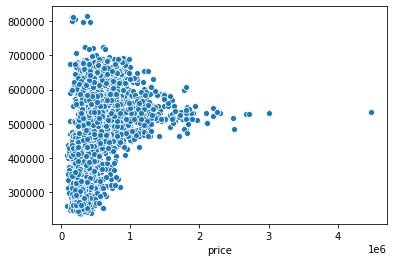

In [86]:
# Evaluar el modelo:
sns.scatterplot(Y_test, modelA2.predict(X_test)) # La función predict() ya tiene en cuenta el intercept.

In [87]:
modelA2.score(X,Y) #r^2

0.1576515578498301

#### Claramente este modelo, con 0.15, es inaceptable.

In [88]:
# Desglose de los coeficientes:
for i in range(len(regresores)):
    print(regresores[i],list(modelA1.coef_)[i])

bathrooms 43.2032573117697
bedrooms -25703.153016723787
floors -15118.707616107386
waterfront 308.6419417926683
view 18669.67327839866
condition 30203.881786056176
grade 112417.33525785219
sqft_basement 50158.97054379843
sqft_above 87244.14066549262
sqft_living_actualized 19238.8807148731
sqft_lot_actualized -6754.068262269774


In [89]:
modelA2.intercept_

488955.0477957281

#### Se <b><u>GUARDA</b></u> el modelo:

In [90]:
pickle.dump(modelA2, open("../models/modelA2.pkl", "wb"))
modelA2 = pickle.load(open("../models/modelA2.pkl", "rb"))

#### Se <b><u>GUARDA</b></u> el scaler:

In [91]:
pickle.dump(scaler2, open('../scalers/scaler_modelA2.pkl', 'wb'))
sc = pickle.load(open('../scalers/scaler_modelA2.pkl', 'rb'))

### <b style="color: rgb(245, 115, 83);">MODELO ADICIONAL 3:</b>

#### Comienzan las tareas de análisis con la <b><u>CREACIÓN DEL MODELO</u></b>. En este modelo la variable dependiente (Y) es el precio de los inmuebles que se quiere predecir y como variables dependientes se han tomado las siguientes: 'lat', 'long'.

#### <u>Este modelo se distingue del Modelo Principal 1 en que sólo tiene en cuenta las características físicas del inmueble</u>.

In [92]:
Y = df.price #Variable explicada.
regresoresA3 = ['bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'sqft_basement', 'sqft_above', 'sqft_living_actualized', 'sqft_lot_actualized']
X = df[regresoresA3] #Los regresores: variables que explican.

# Escalamos: a cada valor de la variable le restamos su media y dividimos ese resultado entre la desviación típica.
# Nos queda entre -1 y 1.
scaler3 = StandardScaler()
print(scaler3.fit(X))

X = scaler3.transform(X)

StandardScaler()


#### A continuación, <b><u>SE DIVIDE LA BASE DE DATOS</u></b> en una parte de entrenamiento (67%) y una parte de test (33%).

In [93]:
# División de la BD en parte de entrenamiento (67) y parte de test (33):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

#### Seguidamente, <b><u>SE ENTRENA EL MODELO</u></b>.

In [94]:
#Entrenamiento del modelo para el 66% de los datos de la BD:
modelA3 = LinearRegression(fit_intercept=True).fit(X_train,Y_train)

#### Por último, <b><u>SE EVALÚA EL MODELO</u></b>.

<AxesSubplot:xlabel='price'>

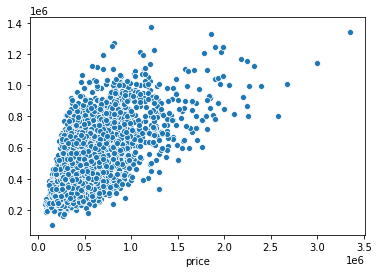

In [95]:
# Evaluar el modelo:
sns.scatterplot(Y_test, modelA3.predict(X_test)) # La función predict() ya tiene en cuenta el intercept.

In [97]:
modelA3.score(X,Y) #r^2

0.43981480679988083

#### Con un resultado de 0.43 este modelo sale peor que el Modelo adicional 1 y por supuesto peor que nuestro modelo principal.

In [98]:
# Desglose de los coeficientes:
for i in range(len(regresoresA3)):
    print(regresoresA3[i],list(modelA3.coef_)[i])

bathrooms 7081.614896732986
bedrooms -35018.713206114706
floors -1540.7185625122765
waterfront 417.83302720936354
view 17878.60521214962
sqft_basement 79031.45203398309
sqft_above 154156.40033296705
sqft_living_actualized 32735.07229233148
sqft_lot_actualized -10255.437283416855


In [99]:
modelA3.intercept_

488484.88010094553

#### Se <b><u>GUARDA</b></u> el modelo:

In [101]:
pickle.dump(modelA3, open("../models/modelA3.pkl", "wb"))
modelA3 = pickle.load(open("../models/modelA3.pkl", "rb"))

#### Se <b><u>GUARDA</b></u> el scaler:

In [102]:
pickle.dump(scaler3, open('../scalers/scaler_modelA3.pkl', 'wb'))
sc = pickle.load(open('../scalers/scaler_modelA3.pkl', 'rb'))